# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [3]:
import pandas as pd
petrol = pd.read_csv('C:\\Users\\User\\Desktop\\AIML\\Residency3\\Lab\\petrol.csv')

petrol_loadedInDataFrame =  pd.DataFrame(petrol)
petrol_loadedInDataFrame.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [4]:
petrol_loadedInDataFrame

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [5]:
IQR = petrol_loadedInDataFrame[' consumption'].quantile(.75) - petrol_loadedInDataFrame[' consumption'].quantile(.25) 
IQR

123.25

Finding min value  using IQR and Q1 

In [6]:
minValue = (petrol_loadedInDataFrame[' consumption'].quantile(.25)) - (1.5*IQR)
minValue

324.625

Finding Max value  using IQR and Q3

In [7]:
maxValue = (petrol_loadedInDataFrame[' consumption'].quantile(.75)) + (1.5*IQR)
maxValue

817.625

Removed outliers using Min and Max value calculated using IQR,Q1 and Q3

In [8]:
petrol_max_outliers_removed = petrol_loadedInDataFrame.loc[(petrol_loadedInDataFrame[' consumption'] < maxValue)]
petrol_max_outliers_removed

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [9]:
petrol_removed_outliers = petrol_max_outliers_removed.loc[petrol_max_outliers_removed[' consumption'] > minValue]
petrol_removed_outliers.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
petrol_removed_outliers.corr()

,tax,income,highway,dl,consumption
tax,1.000000,0.028917,-0.535243,-0.251519,-0.472685
income,0.028917,1.000000,0.050926,0.115030,-0.404929
highway,-0.535243,0.050926,1.000000,-0.058466,0.065716
dl,-0.251519,0.115030,-0.058466,1.000000,0.600198
consumption,-0.472685,-0.404929,0.065716,0.600198,1.000000


In [9]:
np.corcorrcoef(petrol_loadedInDataFrame.tax,petrol_loadedInDataFrame[' consumption'])

array([[ 1.        , -0.45128028],
       [-0.45128028,  1.        ]])

In [10]:
np.corrcoef(petrol_loadedInDataFrame[' highway'],petrol_loadedInDataFrame[' consumption'])

array([[1.        , 0.01904194],
       [0.01904194, 1.        ]])

In [11]:
np.corrcoef(petrol_loadedInDataFrame[' income'],petrol_loadedInDataFrame[' consumption'])

array([[ 1.        , -0.24486207],
       [-0.24486207,  1.        ]])

In [12]:
np.corrcoef(petrol_loadedInDataFrame[' dl'],petrol_loadedInDataFrame[' consumption'])

array([[1.        , 0.69896542],
       [0.69896542, 1.        ]])

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


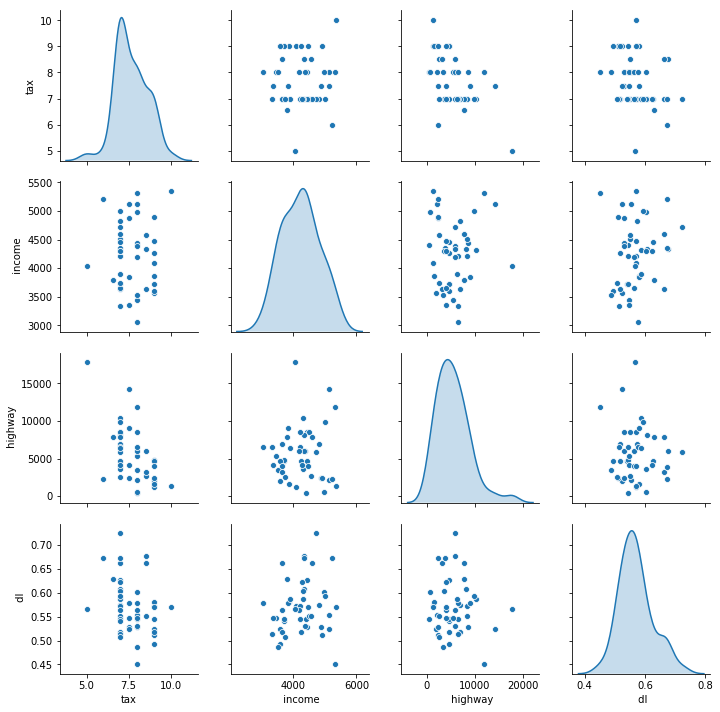

In [13]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 
#importing seaborn for statistical plots
import seaborn as sns
petrol_loadedInDataFrame = petrol_loadedInDataFrame.iloc[:, 0:4]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(petrol_loadedInDataFrame, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(petrol_loadedInDataFrame)  # to plot histogram, the default

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [14]:
#Renamed the coloumn to remove space.
petrol_removed_outliers = petrol_removed_outliers.rename(columns={'tax':'tax',' income':'income',' highway':'highway',' dl':'dl',' consumption':'consumption'})

In [15]:
petrol_removed_outliers.head(3)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


In [16]:
Feature = petrol_removed_outliers

In [17]:
Feature.head(2)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


In [18]:
#Removed target feature and X assigned to only I.V (features)
X= Feature.drop('consumption',axis=1)

In [19]:
X.head(2)

,tax,income,highway,dl
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572


In [20]:
targets = petrol_removed_outliers

In [21]:
targets.head(2)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


In [22]:
Y= targets.drop(['tax','income','highway','dl'],axis=1)

In [23]:
Y.head(2)

,consumption
0,541
1,524


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [24]:
petrol_removed_outliers

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [25]:
petrol_associated_features = petrol_removed_outliers.drop(['highway','income'],axis =1)
petrol_associated_features

,tax,dl,consumption
0,9.00,0.525,541
1,9.00,0.572,524
2,9.00,0.580,561
3,7.50,0.529,414
4,8.00,0.544,410
5,10.00,0.571,457
6,8.00,0.451,344
7,8.00,0.553,467
8,8.00,0.529,464
9,7.00,0.552,498


In [26]:
X = petrol_associated_features.drop('consumption', axis=1)
X.head(2)

,tax,dl
0,9.0,0.525
1,9.0,0.572


In [27]:
y = petrol_associated_features[['consumption']]
y.head(2)

,consumption
0,541
1,524


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [30]:
print ('X_train.shape', X_train.shape)
print ('y_train.shape', y_train.shape)
print ('X_test.shape', X_test.shape)
print ('y_test.shape', y_test.shape)

X_train.shape (36, 2)
y_train.shape (36, 1)
X_test.shape (10, 2)
y_test.shape (10, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for tax is -37.802352751440786
The coefficient for dl is 873.0614980888602


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [34]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 355.9622233252499


In [35]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
regression_model.score(X_train, y_train)

0.4265298656479489

In [36]:
y_train_pred = regression_model.predict(X_train)

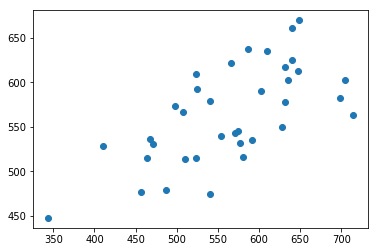

In [37]:
plt.scatter(y_train['consumption'], y_train_pred)

In [38]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train

,tax,dl,consumption
36,5.0,0.566,640
40,7.0,0.626,587
33,7.5,0.547,628
20,7.0,0.663,649
34,8.0,0.487,487
37,7.0,0.586,704
27,7.5,0.579,631
13,7.0,0.545,508
47,7.0,0.593,524
17,7.0,0.540,714


In [39]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'consumption ~ tax+dl', data = data_train).fit()
lm1.params

Intercept    355.962223
tax          -37.802353
dl           873.061498
dtype: float64

In [40]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     12.27
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           0.000104
Time:                        16:49:58   Log-Likelihood:                -199.84
No. Observations:                  36   AIC:                             405.7
Df Residuals:                      33   BIC:                             410.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    355.9622    162.528      2.190      0.036      25.296     686.629
tax          -37.8024     12.399     -3.049      0.005     -63.029     -12.576
dl           873.0615    228.870      3.815      0.001     407.422    1338.701
==============================================================================
Omnibus:                        0.562   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.656
Skew:                           0.255   Prob(JB):                        0.720
Kurtosis:                       2.578   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [41]:
import pandas as pd
petrol_load = pd.read_csv('C:\\Users\\User\\Desktop\\AIML\\Residency3\\Lab\\petrol.csv')

petrol_DataFrame =  pd.DataFrame(petrol_load)
petrol_DataFrame.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [42]:
petrol_DataFrame = petrol_DataFrame.rename(columns={'tax':'tax',' income':'income',' highway':'highway',' dl':'dl',' consumption':'consumption'})

In [43]:
IQR = petrol_DataFrame.consumption.quantile(.75) - petrol_DataFrame.consumption.quantile(.25) 
IQR

123.25

In [44]:
minValue = (petrol_DataFrame.consumption.quantile(.25)) - (1.5*IQR)
minValue

324.625

In [45]:
maxValue = (petrol_DataFrame.consumption.quantile(.75)) + (1.5*IQR)
maxValue

817.625

In [46]:
petrol_DataFrame_max_outliers_removed = petrol_DataFrame.loc[(petrol_DataFrame.consumption < maxValue)]
petrol_DataFrame_max_outliers_removed

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [47]:
petrol_DataFrame_max_outliers_removed_removed_outliers = petrol_DataFrame_max_outliers_removed.loc[petrol_DataFrame_max_outliers_removed.consumption > minValue]
petrol_DataFrame_max_outliers_removed_removed_outliers

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [48]:
X1 = petrol_DataFrame_max_outliers_removed.drop('consumption', axis=1)

In [49]:
X1

,tax,income,highway,dl
0,9.00,3571,1976,0.525
1,9.00,4092,1250,0.572
2,9.00,3865,1586,0.580
3,7.50,4870,2351,0.529
4,8.00,4399,431,0.544
5,10.00,5342,1333,0.571
6,8.00,5319,11868,0.451
7,8.00,5126,2138,0.553
8,8.00,4447,8577,0.529
9,7.00,4512,8507,0.552


In [50]:
y1 = petrol_DataFrame_max_outliers_removed.drop(['tax','income','highway','dl'], axis=1)

In [51]:
y1

,consumption
0,541
1,524
2,561
3,414
4,410
5,457
6,344
7,467
8,464
9,498


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20 , random_state=1)

In [54]:
X1_train.shape

(36, 4)

In [55]:
y1_train.shape

(36, 1)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regression_model1 = LinearRegression()
regression_model1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
data_train1 = pd.concat([X1_train, y1_train], axis=1)
data_train1

,tax,income,highway,dl,consumption
36,5.0,4045,17782,0.566,640
40,7.0,4449,4639,0.626,587
33,7.5,3357,4121,0.547,628
20,7.0,4593,7834,0.663,649
34,8.0,3528,3495,0.487,487
37,7.0,3897,6385,0.586,704
27,7.5,3846,9061,0.579,631
13,7.0,4207,6580,0.545,508
47,7.0,5002,9794,0.593,524
17,7.0,3718,4725,0.540,714


In [59]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'consumption ~ tax+income+highway+dl', data = data_train1).fit()
lm2.params

Intercept    567.059004
tax          -26.998783
income        -0.084484
highway        0.000294
dl           985.532399
dtype: float64

In [60]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     20.69
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           2.17e-08
Time:                        16:50:01   Log-Likelihood:                -186.45
No. Observations:                  36   AIC:                             382.9
Df Residuals:                      31   BIC:                             390.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    567.0590    140.555      4.034      0.000     280.395     853.723
tax          -26.9988     11.873     -2.274      0.030     -51.214      -2.784
income        -0.0845      0.015     -5.459      0.000      -0.116      -0.053
highway        0.0003      0.003      0.105      0.917      -0.005       0.006
dl           985.5324    167.497      5.884      0.000     643.919    1327.145
==============================================================================
Omnibus:                        2.841   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.630
Skew:                           0.404   Prob(JB):                        0.443
Kurtosis:                       3.658   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 9: Print the coefficients of the multilinear regression model

In [61]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

The coefficient for tax is -26.998783111194786
The coefficient for income is -0.08448400284996146
The coefficient for highway is 0.0002938698625561751
The coefficient for dl is 985.5323988586408


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

In [62]:
print ('R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.')

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.


In [63]:
print('Based on R square value, the model predicts the petrol consumption value to 72% accuracy.also it gives relationship between model and dependent variable')

Based on R square value, the model predicts the petrol consumption value to 72% accuracy.also it gives relationship between model and dependent variable


In [64]:
regression_model1.score(X1_train, y1_train)

0.7275292281421979

In [65]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     20.69
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           2.17e-08
Time:                        16:50:01   Log-Likelihood:                -186.45
No. Observations:                  36   AIC:                             382.9
Df Residuals:                      31   BIC:                             390.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    567.0590    140.555      4.034      0.000     280.395     853.723
tax          -26.9988     11.873     -2.274      0.030     -51.214      -2.784
income        -0.0845      0.015     -5.459      0.000      -0.116      -0.053
highway        0.0003      0.003      0.105      0.917      -0.005       0.006
dl           985.5324    167.497      5.884      0.000     643.919    1327.145
==============================================================================
Omnibus:                        2.841   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.630
Skew:                           0.404   Prob(JB):                        0.443
Kurtosis:                       3.658   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""